## Air Phase Cinematic in Rowing


La fase aerea en el remo de banco móvil consiste en un desplazamiento del remero hacia popa de su barco para recuperar una posicion encogida para poder volver a dar una palada y atacar. La correcta realizacion de esta fase (entre otros aspectos) diferencia un mejor de un peor remero. 

Es de especial relevancia la cinemática que sigue el remero a la hora de desplazarse hacia popa ya que es el momento en el que el barco va más rápido relativo al agua. Como cabe esperar los desplzamiento del remero sobre el barco afectan su desplazamiento relativo al agua. La intuición de los que saben refiere a un desplazamiento sin brusquedades. 
Recordar que la pérdida de velocidad (y potencia) en forma de rozamiento con el agua depende de la velocidad del barco, de ahí que la habilidad del remero en el desplazamiento a popa sea clave. Esto es posible "matematizarlo".

Considerar el sistema embarcacion+remero sobre el agua. Donde

$m$ es la masa del remero
$M$ es la masa del barco
$v_{cm}$ es la velocidad del centro de masas del sistema remero+barco
$v_b$ es la velocidad del barco relativa al agua
$v_r$ es la velocidad del remero relativo al barco

Notese que las velocidades pueden ser referidas como $v = \frac{dx}{dt} = \dot{x}$.

El rozamiento a través de un fluido puede modelarse como $\propto v^2$ tal que

$$F_d = \frac{1}{2}C_s \rho A v_b^2$$

El momento lineal del sistema remero+barco toma la forma:

$$p = (M+m)v_{cm}= (M+m)v_b + m v_r$$

Recordando que

$$\frac{dp}{dt} = \sum_i F_i$$

se tiene

$$\frac{dp}{dt} = F_d = (M+m)\frac{dv_b}{dt} + m \frac{dv_r}{dt}$$


Teniendo en cuenta la modelización de la fuerza de rozamiento:

$$- \frac{1}{2}C_s \rho A v_b^2 = (M+m)\frac{dv_b}{dt} + m \frac{dv_r}{dt}$$

Esto nos deja una EDO cuya función incógnita es la velocidad del barco, $v_b$, para una cinemática de el remero $v_r$ dada. Esta es:

$$\frac{dv_b}{dt} = \frac{-1}{M+m}\left( m\frac{dv_r}{dt}- \frac{1}{2}C_p\rho A v_b^2 \right)$$


Resolver esta EDo daría la velocidad del barco en función del tiempo teniendo en cuenta el movimiento del remero. Ahora bien, el movimiento del remero debe plantearse (como trabajo a futuro plantear el problema de optimización de la cinemática de desplazamiento óptima para minimizar pérdida de velocidad del barco). Por el momento es posible plantear una funcion de posicion, velocidad y aceleracion del remero con suficiente libertad que cumpla unas condiciones dadas. 
- El ciclo de desplazamineto sera un periodo $t \in [0, T]$.
- La posicion del remero al inicio debe ser $0$ y al final $$L$ fin de ciclo es, implica $x(t=0)=0$ y $x(T)=L$.
- La velocidad debe ser nula al inicio y fin del ciclo, es decir, $\dot{x}(t=0) = \dot{x}(t=T) = 0$

Con estas condiciones puede resolverse la EDO de la cinematica propuesta con ciertos parametros libres que seran parametro a ajustar posteriormente $a,b,c,d$ aunque exigiendo las condiciones de frontera solo habra dos grados de libertad o parámetros libres $a,b$.

$$\ddot{x}(t) = at^3+bt^2+ct+d $$

Resolviendo para la velocidad:
$$
\dot{x}(t) = \int \left( a t^3 + b t^2 + c t + d \right) \, dt
$$
$$
\dot{x}(t) = \frac{a}{4} t^4 + \frac{b}{3} t^3 + \frac{c}{2} t^2 + d t + C_1
$$
Resolviendo para la posicion

$$
x(t) = \int \left( \frac{a}{4} t^4 + \frac{b}{3} t^3 + \frac{c}{2} t^2 + d t + C_1 \right) \, dt
$$
$$
x(t) = \frac{a}{20} t^5 + \frac{b}{12} t^4 + \frac{c}{6} t^3 + \frac{d}{2} t^2 + C_1 t + C_2
$$

Aplicando las condiciones de contorno:

$$
\dot{x}(t) = \frac{a}{4} t^4 + \frac{b}{3} t^3 + \frac{c}{2} t^2 + d t
$$
$$
x(t) = \frac{a}{20} t^5 + \frac{b}{12} t^4 + \frac{c}{6} t^3 + \frac{d}{2} t^2
$$

donde los parámetro a,b,c,d estan restringidos por estas dos igualdades venidas de las condiciones de contorno:

$$
0 = \frac{a}{4}T^3+\frac{b}{3}T^2+\frac{c}{2}T+d
$$

$$
L = \frac{a}{20}T^5+\frac{b}{12}T^4+\frac{c}{6}T^3+\frac{d}{2}T^2
$$

Dando lugar a 
$$
\begin{cases}
a = a \\
b = b \\
c = -\left( \frac{12 L}{T^3} + \frac{9}{10} T^2 a + T b \right) \\
d = -\left( \frac{T^3}{4} a + \frac{T^2}{3} b + \frac{c T}{2} \right)
\end{cases}
$$

Como se prueba en este notebook, cualquier valor de $a,b$ dan lugar a soluciones cinematicas "ranzonables" para el desplazamiento del remero

Con los coeficientes del polinomio de $\ddot{x(t)}$ podemos sustituirlo en la EDO de la dinámica global $\frac{dv_b}{dt}$.

$$\frac{dv_b}{dt} = \frac{1}{M+m}\left(\frac{1}{2}C_p\rho A v_b^2 - m(at^3+bt^2+ct+d) \right)$$


In [650]:
import numpy as np
import matplotlib.pyplot as plt

In [651]:
def acceleracion(t,coefs):
    a,b,c,d = coefs
    acc = a*t**3+b*t**2+c*t+d
    return acc


def velocidad(t, coefs, v_0=0):
    a,b,c,d = coefs
    vel = a/4*t**4+b/3*t**3+c/2*t**2+d*t# +v_0
    return vel


def posicion(t, coefs, x_0=0, v0=0):
    a,b,c,d = coefs
    pos = a/20*t**5+b/12*t**4+c/6*t**3+d/2*t**2#+v0*t+x_0
    return pos

In [652]:
def coef_permitidos(a,b,T,L):
    c = -(12*L/(T**3)+9/10*T**2*a+T*b)
    d = -(T**3)/4*a-(T**2)/3*b-c*T/2
    return a,b,c,d

In [653]:
v_0 = 0
x_0 = 0
T = 1
L = 1
tt = np.linspace(0, T)


a, b = -45,33
coefs = coef_permitidos(a,b,T,L)
print(coefs)


xx = posicion(tt, coefs, x_0, v_0)
aa = acceleracion(tt,coefs)
vv = velocidad(tt, coefs, v_0)


(-45, 33, -4.5, 2.5)


In [654]:
p = posicion(T, coefs)
p

1.0

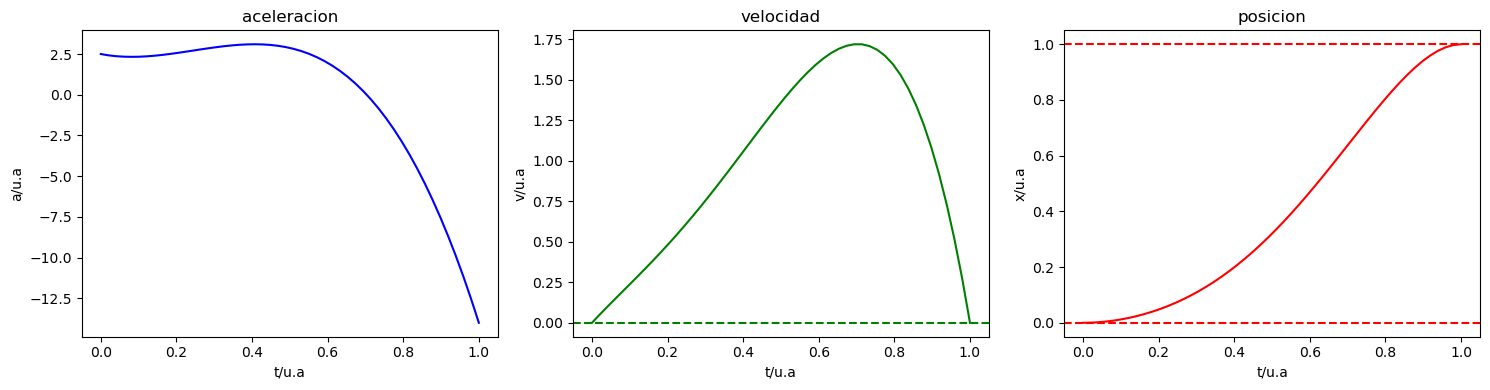

In [655]:
# Crear figura y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnas

# Primer plot
axs[0].plot(tt, aa, color='blue')
axs[0].set_title('aceleracion')
axs[0].set_xlabel('t/u.a')
axs[0].set_ylabel('a/u.a')

# Segundo plot
axs[1].plot(tt, vv, color='green')
axs[1].set_title('velocidad')
axs[1].set_xlabel('t/u.a')
axs[1].set_ylabel('v/u.a')
axs[1].axhline(y=0, color='green', linestyle='--')  # Línea horizontal en y=0
# axs[2].axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0

# Tercer plot
axs[2].plot(tt, xx, color='red')
axs[2].set_title('posicion')
axs[2].set_xlabel('t/u.a')
axs[2].set_ylabel('x/u.a')
axs[2].axhline(y=1, color='red', linestyle='--')  # Línea horizontal en y=0
axs[2].axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0

# axs[2].set_ylim(-L, 2*L)  # Limitar eje y para que no explote con tan(x)

# Ajustar espacio entre plots
plt.tight_layout()

# Mostrar figura
plt.show()